## Asteroid hunting

Consider the hypothetical dataset `asteroid_*.png`. There is a moving object in this frame sequence,
and our goal is to find its trajectory.

In [1]:
%matplotlib inline

import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
frames = ski.io.ImageCollection('asteroid_*.png')

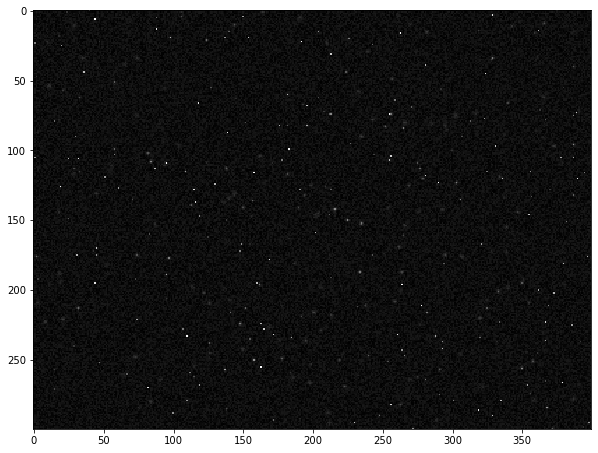

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(frames[0]);

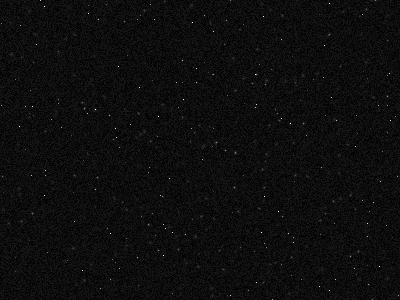

In [4]:
from IPython.display import Image
Image('asteroid.gif', width=600)

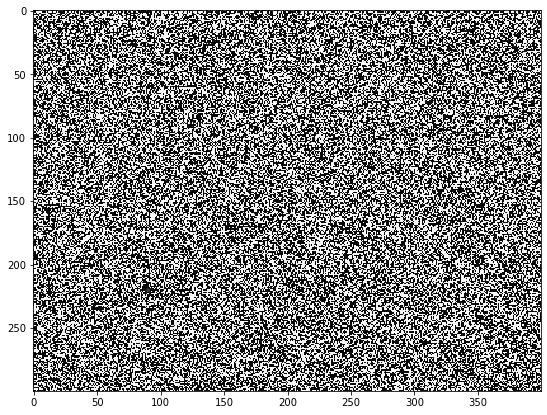

In [5]:
plt.imshow(frames[3] - frames[0]);

In [6]:
denoised = [ski.filters.median(x) for x in frames]

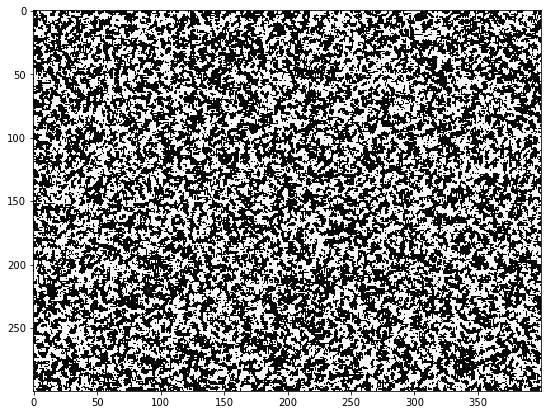

In [7]:
plt.imshow(denoised[3] - denoised[0]);

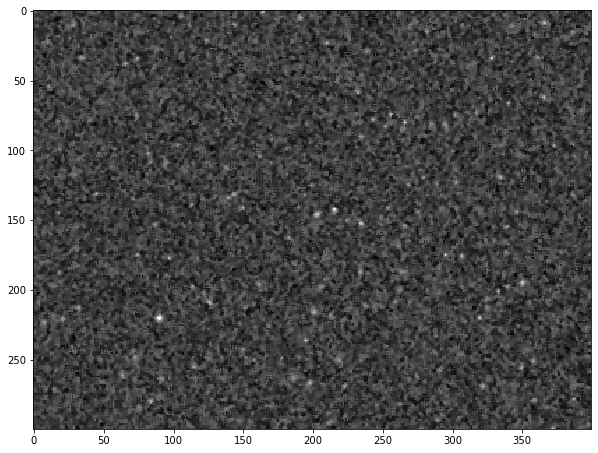

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(denoised[3] - np.mean(frames));

Integration over zero mean noise — zero or a constant if you are lucky!

In [9]:
delta = denoised[3] - np.mean(frames)

In [10]:
T = 0.7

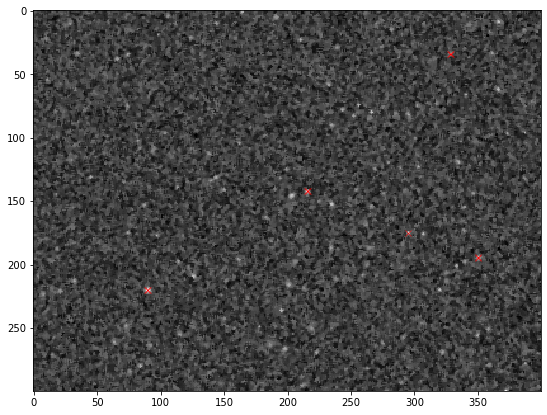

In [11]:
peaks = ski.feature.peak_local_max(delta, threshold_rel=T)
plt.imshow(delta)
plt.scatter(peaks[:, 1], peaks[:, 0], marker='x', lw=0.5, color='red');

In [12]:
all_peaks = []
mean_frame = np.mean(frames)
for f in denoised[1:]:
    delta = f - mean_frame
    peaks = ski.feature.peak_local_max(delta, threshold_rel=T)
    all_peaks.extend(peaks.tolist())

In [13]:
all_peaks = np.reshape(all_peaks, (-1, 2))
model, inliers = ski.measure.ransac(all_peaks[:, ::-1],
                                    ski.measure.LineModelND,
                                    min_samples=2,
                                    residual_threshold=1)

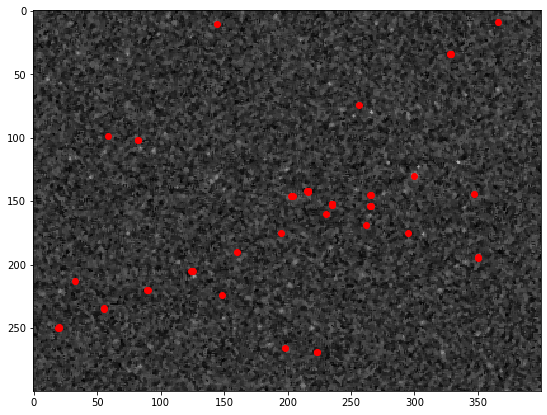

In [14]:
plt.imshow(delta)
plt.scatter(all_peaks[:, 1], all_peaks[:, 0], color='r', marker='o');

Uh oh.

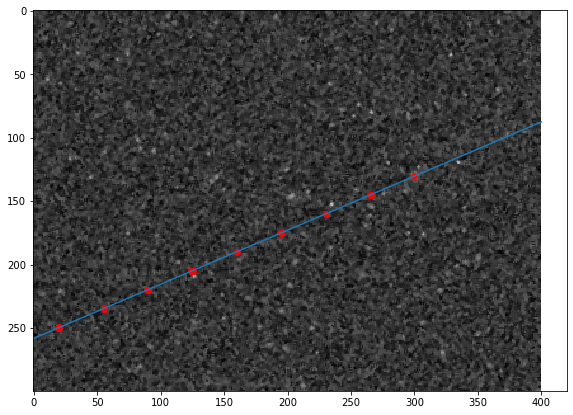

In [15]:
plt.imshow(delta)
track = all_peaks[inliers]
plt.scatter(track[:, 1], track[:, 0], color='r', marker='o')

x = np.linspace(0, delta.shape[1], 100)
plt.plot(x, model.predict_y(x));

Unfortunately, this procedure is quite brittle.  Problems include:

- False detections leading to false fits
- No ability to incorporate time into fit

Can you think of ways to improve the process?